In [1]:
import matplotlib.pyplot as plt
import networkx as netx
import numpy as np
import random
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from scipy.linalg import eigh
from numpy import linalg as LA
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
import time

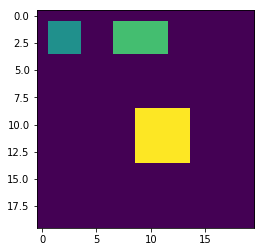

In [2]:
N = 20
C0 = np.zeros((N,N),dtype=float)
C0[1:4,1:4]   = 5
C0[9:14,9:14] = 10
C0[1:4,7:12]  = 7
plt.imshow(C0)

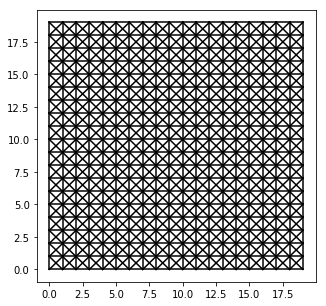

In [3]:
G = netx.DiGraph()
A = np.zeros((N**2,N**2),dtype=float)
dx = [-1,0,1,-1,1,-1,0,1]
dy = [-1,-1,-1,0,0,1,1,1]
ndx = len(dx)

plt.figure(figsize=(5,5))
for i in range(N):
    for j in range(N):
        ind = i*N + j
        G.add_node(ind)
        for ne in range(ndx):
            ii = i + dx[ne]
            jj = j + dy[ne]
            if(ii>-1 and ii<N and jj>-1 and jj<N):
                ind2 = ii*N + jj
                A[ind,ind2] = 1
                G.add_edge(ind,ind2)
                if(ind2>ind):
                    plt.plot([i,ii],[j,jj],"k")    
                
                
#netx.draw(G)
plt.show()

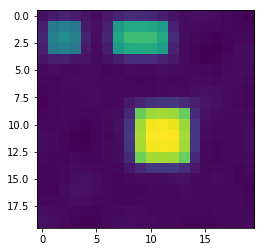

In [7]:
D = np.diag(sum(A,2))
L = D - A
[EVL, EVC]=LA.eig(L)
CC = C0.flatten()

fig,ax=plt.subplots(1,1)

VCC = np.matmul(EVC.transpose(),CC)
t = 0
it = 0
while t<0.06:
    it  = it + 1
    t   = t + 0.02
    Phi = np.multiply(VCC,np.exp(-EVL*t))
    Phi = np.matmul(EVC,Phi)
    Phi = np.reshape(Phi,(N,N))
    
    ax.cla()
    ax.imshow(Phi)
    #plt.pause(0.1)